# Série Histórica de Preços de Combustíveis (01/2015 - 06/2022)
### (Historical Fuel Price Series in Brazil)

Esse projeto tem por objetivo a análise e criação de um dashboard interativo mostrando a variação de preço dos combustíveis no Brasil de janeiro de 2015 até junho de 2022. Combustíveis analisados: Gasolina, Gasolina Aditivada, Etanol, Diesel, Diesel S10 e GNV.

The purpose of this project is the creation and analysis of an interactive dashboard showing the price variation of several types of fuel in Brazil from January of 2015 to June of 2022. Analyzed fuels: Regular Gas, Premium Gas, Ethanol, Diesel, Diesel S10 and Compressed Natural Gas. 

Fonte (Data Source): https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda

In [1]:
# Bibliotecas necessárias
# Required libraries

import pandas as pd
import numpy as np
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Leitura dos bancos de dados para dentro do projeto
# Databases reading into the project

df01 = pd.read_csv('ca-2015-01.csv', sep=';') #1º semestre de 2015
df02 = pd.read_csv('ca-2015-02.csv', sep=';') #2º semestre de 2015
df03 = pd.read_csv('ca-2016-01.csv', sep=';') #1º semestre de 2016
df04 = pd.read_csv('ca-2016-02.csv', sep=';') #2º semestre de 2016
df05 = pd.read_csv('ca-2017-01.csv', sep=';') #1º semestre de 2017
df06 = pd.read_csv('ca-2017-02.csv', sep=';') #2º semestre de 2017
df07 = pd.read_csv('ca-2018-01.csv', sep=';') #1º semestre de 2018
df08 = pd.read_csv('ca-2018-02.csv', sep=';') #2º semestre de 2018
df09 = pd.read_csv('ca-2019-01.csv', sep=';') #1º semestre de 2019
df10 = pd.read_csv('ca-2019-02.csv', sep=';') #2º semestre de 2019
df11 = pd.read_csv('ca-2020-01.csv', sep=';') #1º semestre de 2020
df12 = pd.read_csv('ca-2020-02.csv', sep=';') #2º semestre de 2020
df13 = pd.read_csv('ca-2021-01.csv', sep=';') #1º semestre de 2021
df14 = pd.read_csv('ca-2021-02.csv', sep=';') #2º semestre de 2021
df15 = pd.read_csv('precos-diesel-gnv-01.csv', sep=';') #diesel-gnv-janeiro
df16 = pd.read_csv('precos-diesel-gnv-02.csv', sep=';') #diesel-gnv-fevereiro
df17 = pd.read_csv('precos-diesel-gnv-03.csv', sep=';') #diesel-gnv-março -> **diesel-gnv-abril não consta**
df18 = pd.read_csv('precos-diesel-gnv-05.csv', sep=';') #diesel-gnv-maio
df19 = pd.read_csv('precos-gasolina-etanol-01.csv', sep=';') #gasolina-etanol-janeiro
df20 = pd.read_csv('precos-gasolina-etanol-02.csv', sep=';') #gasolina-etanol-fevereiro
df21 = pd.read_csv('precos-gasolina-etanol-03.csv', sep=';') #gasolina-etanol-março
df22 = pd.read_csv('precos-gasolina-etanol-04.csv', sep=';') #gasolina-etanol-abril
df23 = pd.read_csv('precos-gasolina-etanol-05.csv', sep=';') #gasolina-etanol-maio
df24 = pd.read_csv('ultimas-4-semanas-diesel-gnv-2.csv', sep=';') #diesel-gnv-junho
df25 = pd.read_csv('ultimas-4-semanas-gasolina-etanol-2.csv', sep=';') #gasolina-etanol-junho

C:\Users\Dell Inspiron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Criação de lista com todos DataFrames
# Creation of a DataFrame list
data_frames = [df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25]

In [9]:
# Criação de lista com todas as colunas dos DataFrames
# List creation of all DataFrames columns
list = df01.columns.tolist()

In [40]:
# Criação de um DataFrame com todas as informações dos Bancos de Dados
# Creation of a main DataFrame with all the datasets' information
dados2015_2022 = reduce(lambda  left,right: pd.merge(left,right,on=list,
                                            how='outer'), data_frames)

In [41]:
# Número de linhas e colunas do DataFrame (6.845.248 de linhas e 16 colunas)
# Number of rows and columns
dados2015_2022.shape

(6845248, 16)

In [42]:
# Renomeação da Coluna Estado
# Renaming of column 'State'
dados2015_2022.rename(columns={'Estado - Sigla': 'Estado'}, inplace = True)

In [43]:
# Filtro das colunas mais importantes para o projeto
# Sorting the most important columns for the project
dados2015_2022 = dados2015_2022[['Estado', 'Municipio', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Bandeira']]

In [44]:
dados2015_2022.head()

,Estado,Municipio,Produto,Data da Coleta,Valor de Venda,Bandeira
0,AC,SENADOR GUIOMARD,GASOLINA,01/01/2015,"3,44",DNP
1,AC,SENADOR GUIOMARD,ETANOL,01/01/2015,3,DNP
2,AC,SENADOR GUIOMARD,DIESEL,01/01/2015,"3,1",DNP
3,AC,SENADOR GUIOMARD,DIESEL S10,01/01/2015,"3,2",DNP
4,AC,SENADOR GUIOMARD,GASOLINA,01/01/2015,"3,44",SABBÁ


In [47]:
# Criação do arquivo CSV com os dados conectados, limpos e organizados
# Creation of a CSV file with the cleaned and sorted data
dados2015_2022.to_csv('preco_combustiveis_brasil_2015_2022.csv', sep=';', index=False)

In [2]:
# Leitura do arquivo CSV com todos dados conectados
# Reading of the main CSV file
dados2015_2022 = pd.read_csv('preco_combustiveis_brasil_2015_2022.csv', sep=';')

In [3]:
# Primeiras cinco linhas do DataFrame
# First five rows of the DataFrame
dados2015_2022.head()

,Estado,Municipio,Produto,Data da Coleta,Valor de Venda,Bandeira
0,AC,SENADOR GUIOMARD,GASOLINA,01/01/2015,"3,44",DNP
1,AC,SENADOR GUIOMARD,ETANOL,01/01/2015,3,DNP
2,AC,SENADOR GUIOMARD,DIESEL,01/01/2015,"3,1",DNP
3,AC,SENADOR GUIOMARD,DIESEL S10,01/01/2015,"3,2",DNP
4,AC,SENADOR GUIOMARD,GASOLINA,01/01/2015,"3,44",SABBÁ


In [4]:
# Visualização dos 'data types' de cada coluna
# Data types visualization
dados2015_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845248 entries, 0 to 6845247
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Estado          object
 1   Municipio       object
 2   Produto         object
 3   Data da Coleta  object
 4   Valor de Venda  object
 5   Bandeira        object
dtypes: object(6)
memory usage: 313.4+ MB


In [5]:
# Descrição estatística de cada coluna do DataFrame
# Statistics description of every DataFrame columns
dados2015_2022.describe()

,Estado,Municipio,Produto,Data da Coleta,Valor de Venda,Bandeira
count,6845248,6845248,6845248,6845248,6845248,6845248
unique,27,600,6,1639,6015,113
top,SP,SAO PAULO,GASOLINA,17/08/2020,"2,999",BRANCA
freq,1974104,203560,2025147,18316,144059,2205754


In [6]:
# Conversão da coluna 'Valor de Venda' de 'String' para 'Float64' 
# Convertion of the 'Sale Value' column  from 'String' to 'Float64'
dados2015_2022['Valor de Venda'] = dados2015_2022['Valor de Venda'].str.replace(',','.').astype(np.float64)

In [7]:
# Conversão da coluna 'Data da Coleta' de 'String' para 'DateTime64[ns]' 
# Convertion of the 'Collection Date' column from 'String' to 'DateTime64[ns]'
dados2015_2022['Data da Coleta'] = pd.to_datetime(dados2015_2022['Data da Coleta'], format='%d/%m/%Y')

In [8]:
# Visualização dos 'data types' de cada coluna agora com a coluna 'Valor de Venda' como 'Float64'
# e a coluna 'Data da Coleta' como 'DateTime64[ns]'

# Visualization of the columns data types

dados2015_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845248 entries, 0 to 6845247
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Estado          object        
 1   Municipio       object        
 2   Produto         object        
 3   Data da Coleta  datetime64[ns]
 4   Valor de Venda  float64       
 5   Bandeira        object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 313.4+ MB


In [9]:
# Preço do combustível mais caro no país até junho de 2022
# Price of the most expensive fuel in the country until June 2022
dados2015_2022['Valor de Venda'].max()

9.28

In [10]:
# Informações detalhadas sobre o combustível mais caro do país até junho de 2022
# Detailed information of the most expensive fuel in the country until June 2022
dados2015_2022.loc[dados2015_2022['Valor de Venda'] == 9.28]

,Estado,Municipio,Produto,Data da Coleta,Valor de Venda,Bandeira
6808287,RJ,MAGE,GASOLINA ADITIVADA,2022-06-09,9.28,VIBRA ENERGIA
6837338,RJ,MAGE,GASOLINA ADITIVADA,2022-06-20,9.28,VIBRA ENERGIA


In [11]:
# Preço do combustível mais barato no país a partir de 2015
# Price of the most cheap fuel in the country from January 2015
dados2015_2022['Valor de Venda'].min()

1.379

In [12]:
# Informações detalhadas sobre o combustível mais barato do país a partir de 2015
# Detailed information of the most cheap fuel in the country from January 2015
dados2015_2022.loc[dados2015_2022['Valor de Venda'] == 1.379]

,Estado,Municipio,Produto,Data da Coleta,Valor de Venda,Bandeira
8547,RJ,RIO DE JANEIRO,GNV,2015-01-06,1.379,BRANCA
35708,RJ,RIO DE JANEIRO,GNV,2015-01-13,1.379,BRANCA
89949,RJ,RIO DE JANEIRO,GNV,2015-01-27,1.379,BRANCA
144356,RJ,RIO DE JANEIRO,GNV,2015-02-11,1.379,BRANCA


In [62]:
# Dados sobre a variação de preço da gasolina no município de São Paulo no ano de 2021
# Price variation of regular gas in Sao Paulo (SP) in 2021
SaoPauloGasolina2021= dados2015_2022.loc[(dados2015_2022['Municipio'] == 'SAO PAULO') & (dados2015_2022['Produto'] == 'GASOLINA') & (dados2015_2022['Data da Coleta'] >= '2021-01-01') & (dados2015_2022['Data da Coleta'] <= '2021-12-31')]
SaoPauloGasolina2021.tail()

,Estado,Municipio,Produto,Data da Coleta,Valor de Venda,Bandeira
6362602,SP,SAO PAULO,GASOLINA,2021-12-29,6.299,BRANCA
6362907,SP,SAO PAULO,GASOLINA,2021-12-29,6.799,RAIZEN
6363205,SP,SAO PAULO,GASOLINA,2021-12-29,6.399,IPIRANGA
6363594,SP,SAO PAULO,GASOLINA,2021-12-29,6.799,IPIRANGA
6363792,SP,SAO PAULO,GASOLINA,2021-12-29,6.179,BRANCA


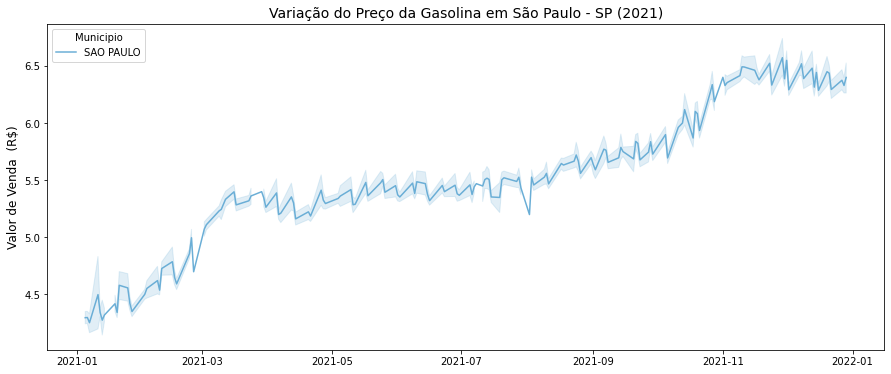

In [63]:
# Criação de um gráfico de linhas com a Variação do Preço da Gasolina em São Paulo (SP) em 2021
# Line graph of price variation of regular gas in Sao Paulo (SP) in 2021
plt.figure(figsize=(15,6))
sns.lineplot(data=SaoPauloGasolina2021,x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Blues')
plt.title('Variação do Preço da Gasolina em São Paulo - SP (2021)', fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

In [31]:
# Criação de um Dataframe com a variação do preço da gasolina em 2021 nos municípios de São Paulo (SP), Rio de Janeiro (RJ)
# e Brasília (DF)

# Creation of a DataFrame with price varation of regular gas in 2021 in the cities of São Paulo (SP), Rio de Janeiro (RJ)
# and Brasília (DF)

df1 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'SAO PAULO') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

df2 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'RIO DE JANEIRO') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

df3 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'BRASILIA') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

dfs = [df1, df2, df3]

list_ = df1.columns.tolist()

Gasolina2021_SaoPaulo_RiodeJaneiro_Brasilia = reduce(lambda  left,right: pd.merge(left,right,on=list_,
                                            how='outer'), dfs)

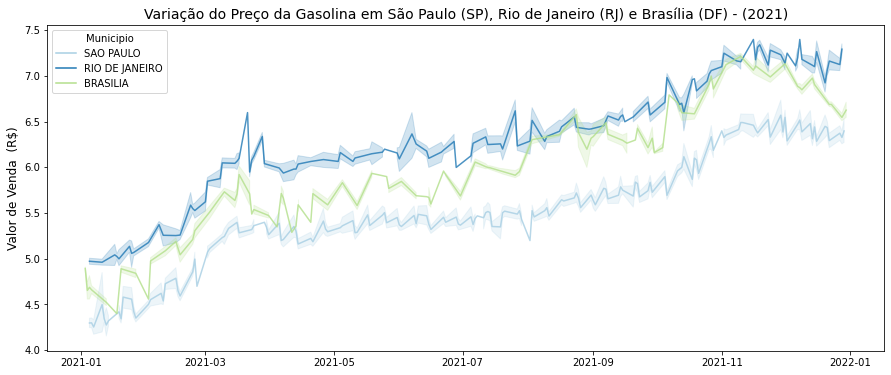

In [68]:
# Criação de um gráfico de linhas com a Variação do Preço da Gasolina em São Paulo (SP), Rio de Janeiro (RJ)
# e Brasília (DF) em 2021

# Line graph of price variation of regular gas in Sao Paulo (SP), Rio de Janeiro (RJ) and Brasília (DF) in 2021

plt.figure(figsize=(15,6))
palette=sns.color_palette("Set2")
sns.lineplot(data=Gasolina2021_SaoPaulo_RiodeJaneiro_Brasilia, x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Paired', alpha=0.8)
plt.title('Variação do Preço da Gasolina em São Paulo (SP), Rio de Janeiro (RJ) e Brasília (DF) - (2021)', fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

In [69]:
# Criação de um Dataframe com a variação do preço da gasolina até junho de 2022 nos municípios de São Paulo (SP), 
# Rio de Janeiro (RJ) e Brasília (DF)

# Creation of a DataFrame with price varation of regular gas in 2022 in the cities of São Paulo (SP), Rio de Janeiro (RJ)
# and Brasília (DF)

df1 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'SAO PAULO') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')]                    

df2 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'RIO DE JANEIRO') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')]                   

df3 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'BRASILIA') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')] 
                   

dfs = [df1, df2, df3]

list_ = df1.columns.tolist()

Gasolina2022_SaoPaulo_RiodeJaneiro_Brasilia = reduce(lambda  left,right: pd.merge(left,right,on=list_,
                                            how='outer'), dfs)

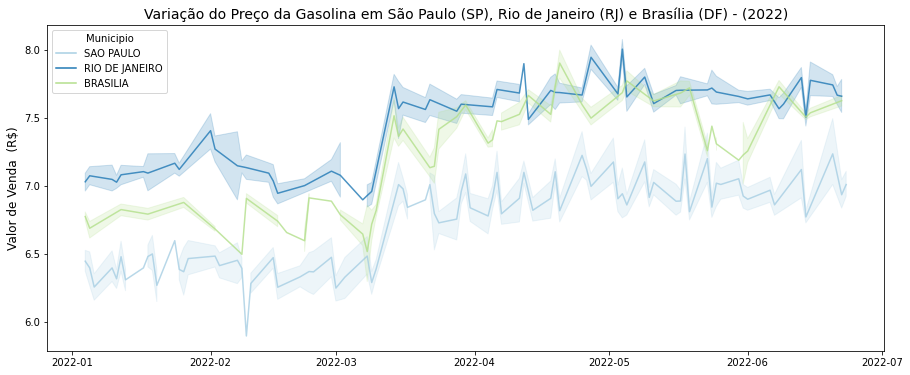

In [70]:
# Criação de um gráfico de linhas com a Variação do Preço da Gasolina em São Paulo (SP), Rio de Janeiro (RJ)
# e Brasília (DF) até junho de 2022

# Line graph of price variation of regular gas in Sao Paulo (SP), Rio de Janeiro (RJ) and Brasília (DF) in 2022

plt.figure(figsize=(15,6))
palette=sns.color_palette("Set2")
sns.lineplot(data=Gasolina2022_SaoPaulo_RiodeJaneiro_Brasilia, x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Paired', alpha=0.8)
plt.title('Variação do Preço da Gasolina em São Paulo (SP), Rio de Janeiro (RJ) e Brasília (DF) - (2022)', fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

In [71]:
# Criação de um Dataframe com a variação do preço da gasolina em 2021 nos municípios de Curitiba (PR), Florianópolis (SC)
# e Porto Alegre (RS)

# Creation of a DataFrame with price varation of regular gas in 2021 in the cities of Curitiba (PR), Florianópolis (SC)
# and Porto Alegre (RS) 

df1 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'CURITIBA') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

df2 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'FLORIANOPOLIS') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

df3 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'PORTO ALEGRE') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2021-01-01') & 
                   (dados2015_2022['Data da Coleta'] <= '2021-12-31')]

dfs = [df1, df2, df3]

list_ = df1.columns.tolist()

Gasolina2021_Curitiba_Florianopolis_PortoAlegre = reduce(lambda  left,right: pd.merge(left,right,on=list_,
                                            how='outer'), dfs)

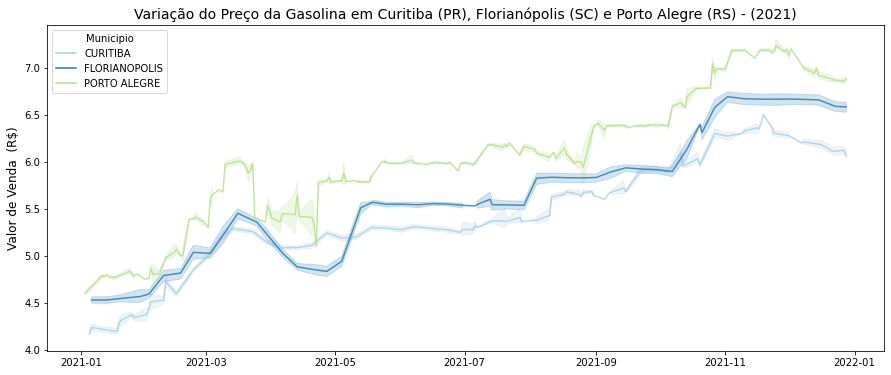

In [73]:
# Criação de um gráfico de linhas com a Variação do Preço da Gasolina em Curitiba (PR), Florianópolis (SC)
# e Porto Alegre (RS) em 2021

# Line graph of price variation of regular gas in Curitiba (PR), Florianópolis (SC) and Brasília (DF) in 2021

plt.figure(figsize=(15,6))
palette=sns.color_palette("Set2")
sns.lineplot(data=Gasolina2021_Curitiba_Florianopolis_PortoAlegre, x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Paired', alpha=0.8)
plt.title('Variação do Preço da Gasolina em Curitiba (PR), Florianópolis (SC) e Porto Alegre (RS) - (2021)', fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

In [74]:
# Criação de um Dataframe com a variação do preço da gasolina até junho de 2022 nos municípios de Curitiba (PR), 
# Florianópolis (SC) e Porto Alegre (RS)

# Creation of a DataFrame with price varation of regular gas in 2022 in the cities of Curitiba (PR), Florianópolis (SC)
# and Porto Alegre (RS) 

df1 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'CURITIBA') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')]

df2 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'FLORIANOPOLIS') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')]

df3 = dados2015_2022.loc[(dados2015_2022['Municipio'] == 'PORTO ALEGRE') &
                   (dados2015_2022['Produto'] == 'GASOLINA') & 
                   (dados2015_2022['Data da Coleta'] >= '2022-01-01')]

dfs = [df1, df2, df3]

list_ = df1.columns.tolist()

Gasolina2022_Curitiba_Florianopolis_PortoAlegre = reduce(lambda  left,right: pd.merge(left,right,on=list_,
                                            how='outer'), dfs)

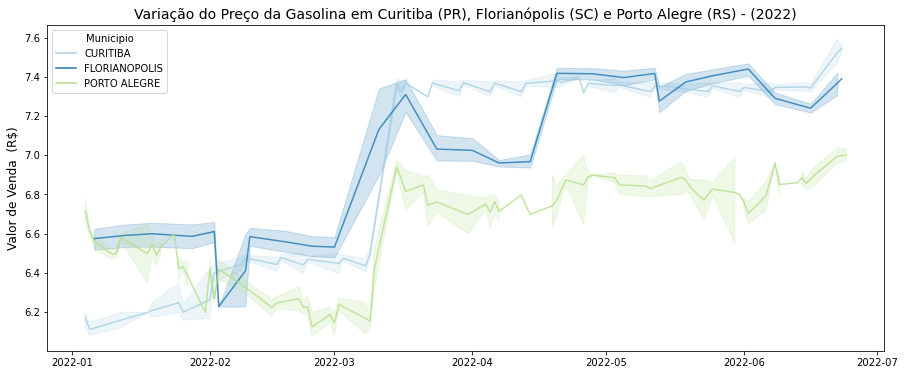

In [75]:
# Criação de um gráfico de linhas com a Variação do Preço da Gasolina em Curitiba (PR), Florianópolis (SC)
# e Porto Alegre (RS) até junho de 2022

# Line graph of price variation of regular gas in Curitiba (PR), Florianópolis (SC) and Brasília (DF) until june 2022

plt.figure(figsize=(15,6))
palette=sns.color_palette("Set2")
sns.lineplot(data=Gasolina2022_Curitiba_Florianopolis_PortoAlegre, x='Data da Coleta', 
             y='Valor de Venda', hue='Municipio', palette='Paired', alpha=0.8)
plt.title('Variação do Preço da Gasolina em Curitiba (PR), Florianópolis (SC) e Porto Alegre (RS) - (2022)', fontsize=14)
plt.ylabel('Valor de Venda  (R$)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()